## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Answers:**


1.   Regression is predicting a numeric or continuous outcome (i.e. price), whereas classification is predicting a categorical outcome (i.e. class).
2.   A confusion table is a cross-tabulation of predicted and actual values. It measures the performance of a classifier.
3.   The SSE quantifies how far the predicted values are from the true value. It is used as a metric for fit.
4.   Underfitting is when your model is too simple to reliably explain the phenomenon you are interested in, and overfitting is when your model is too complex to reliably explain the phenomenon you are interested in.
5.  Whenever we split the sample, we're substituting uncertainty about future predictions for uncertainty about the hold-out data in order to test the model. Essentially, our goal is for the model to make good predictions. In order to account for the uncertainty in future predictions, we can split the sample into training and testing sets to make sure the model works well with new data. We assume that if the model can handle the new, unseen data well that we split off from our sample, then it will perform well in future predictions. When we choose k by evaluating accuracy or SSE, we choose k based on the value that allows the model to perform best on unseen data, essentially improving model performance.
6.  



**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [10]:
!git clone https://github.com/siwenliao/KNN
%cd /content/KNN

Cloning into 'KNN'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52 (delta 12), reused 28 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 19.89 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/KNN


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# 1: Loading dataset, subsetting dataframe, and dimensions/NA's

cars_df = pd.read_csv('./data/USA_cars_datasets.csv')
cars_df = cars_df.loc[:,['price', 'year', 'mileage']]
null_count = cars_df.isnull().sum()
print('Head: \n', cars_df.head(), '\n')
print('Dimensions:', cars_df.shape, '\n')
print('Null values: ', null_count)

Head: 
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

Dimensions: (2499, 3) 

Null values:  price      0
year       0
mileage    0
dtype: int64


There are no NA's to handle.

In [13]:
# 2: Normalize

def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

cars_df['year'] = maxmin(cars_df['year'])
cars_df['mileage'] = maxmin(cars_df['mileage'])
print(cars_df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [14]:
# 3: Split sample

from sklearn.model_selection import train_test_split

y = cars_df['price']
X = cars_df.loc[:,['year', 'mileage']]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=65)

k value: 3 

mean squared error: 133487993.49644443 



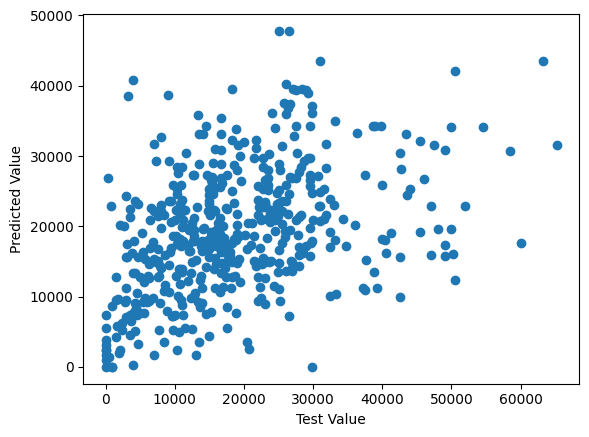

k value: 10 

mean squared error: 111588702.61873999 



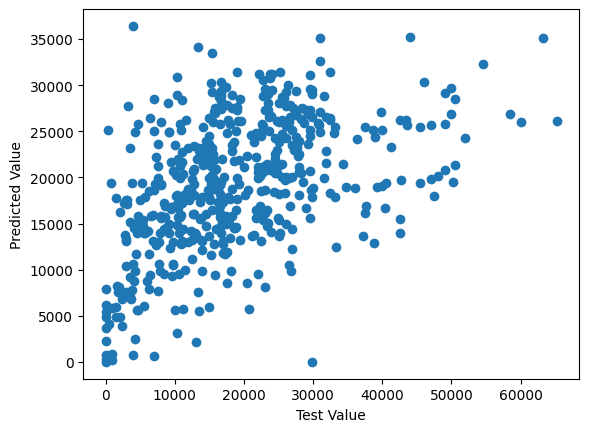

k value: 25 

mean squared error: 104962784.87012799 



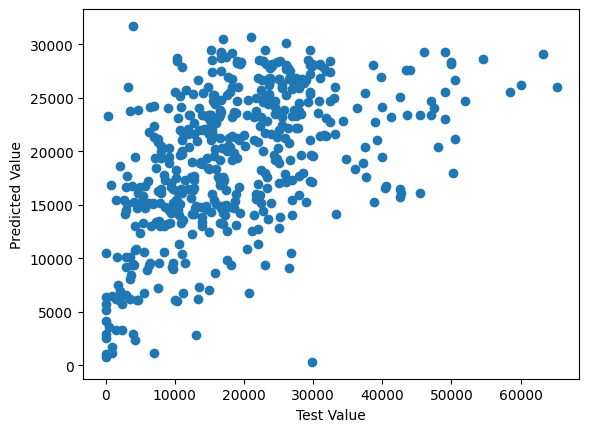

k value: 50 

mean squared error: 103873193.2199608 



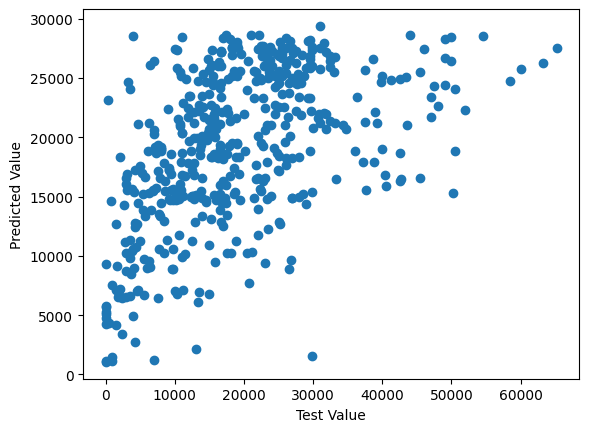

k value: 100 

mean squared error: 104534999.25921261 



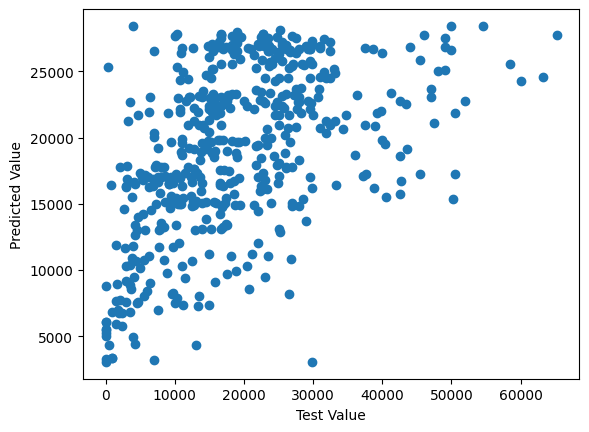

k value: 300 

mean squared error: 107657680.73624039 



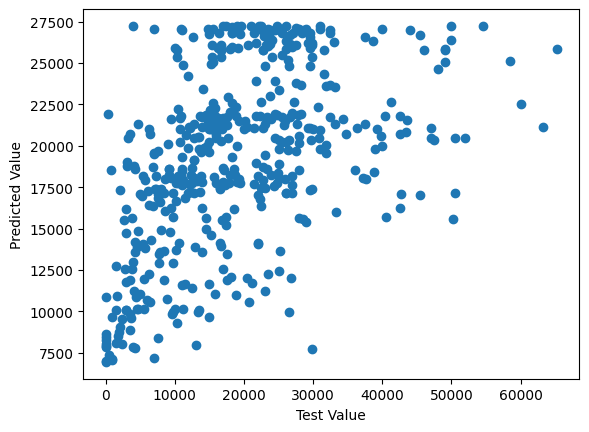

In [16]:
# 4: kNN and mean squared error

from sklearn.metrics import mean_squared_error
# mean_squared_error code from https://www.geeksforgeeks.org/python/python-mean-squared-error/

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    print('k value:', k, '\n')
    print('mean squared error:', mse, '\n')
    plt.scatter(y_test, y_hat)
    plt.xlabel('Test Value')
    plt.ylabel('Predicted Value')
    plt.show()

What patterns do you notice as k increases?

In [19]:
# 5: Determine the optimal k

k_bar = 50
SSE = []

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum((y_test-y_hat)**2))

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

[28]


6: Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [32]:
# 1: Load the data and EDA
animals_df = pd.read_csv('./data/zoo.csv')
print('head: \n', animals_df.head(), '\n')
print('dimensions: \n', animals_df.shape, '\n')
print('variables: \n', animals_df.columns, '\n')
print('statistics about each feature: \n', animals_df.describe(), '\n')
print('class sizes: \n', animals_df['class'].value_counts(), '\n')

# Getting a sense of what is included in each class
for c in range(1,7):
  print('class:', c)
  print(animals_df[animals_df['class'] == c].value_counts(), '\n')

head: 
      animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1   

dimensions: 
 (101, 18) 

variables

Which variables do you think will best predict which class?

In [33]:
# 2: Splitting the data

from sklearn.model_selection import train_test_split

y = animals_df['class']
X = animals_df.drop(columns=['class', 'animal'])
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.5,
                                                    random_state=100)

In [36]:
# 3: kNN classifier

from sklearn.neighbors import KNeighborsClassifier

# Solve for k that maximizes accuracy:
k_bar = 50
Acc = []
N_train=len(y_train)
N_test=len(y_test)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc.append(np.sum(y_hat == y_test)/N_test)

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
k_star = max_index[0]+1
print(k_star)

model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

[1]


In [37]:
# 4: Confusion table

pd.crosstab(y_test,y_hat)

col_0,1,2,3,4,5,6,7
class,,,,,,,
1,19,0,0,0,0,0,0
2,0,8,0,0,0,0,0
3,1,0,1,1,1,0,0
4,0,0,0,8,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,4,0
7,0,0,2,2,0,0,2


How accurate it is? Can you interpret why mistakes are made across groups?

In [40]:
# 5

y = animals_df['class']
X = animals_df.loc[:,['milk', 'aquatic', 'airborne']]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.5,
                                                    random_state=100)

k_bar = 50
Acc = []
N_train=len(y_train)
N_test=len(y_test)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc.append(np.sum(y_hat == y_test)/N_test)

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
k_star = max_index[0]+1
print(k_star)

model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

print('Confusion table: \n', pd.crosstab(y_test,y_hat), '\n')

print('Probabilities: \n', model.predict_proba(X_test.values), '\n')
print('Classes represented in model: \n', model.classes_)

[2 4 5 6]
Confusion table: 
 col_0   1   2  4
class           
1      23   0  0
2       0  12  0
3       0   2  1
4       0   0  3
5       0   0  3
6       0   5  0
7       0   0  2 

Probabilities: 
 [[0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.

Are all of the classes represented? Explain your results.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [41]:
def kernel_density(z, kernel_type = 'gaussian'):
  kernel_type = kernel_type.lower()
  if kernel_type in ['uniform', 'bump']:
      if np.abs(z) <= 1:
        return 1/2
      else:
        return 0
  elif kernel_type == 'epanechnikov':
      if np.abs(z) <= 1:
        return (3/4)*(1-z**2)
      else:
        return 0
  elif kernel_type == 'gaussian':
      return 1/np.sqrt(2*np.pi)*np.exp(-z**2/2)

def bandwidth(data, h_alt = None):
  if h_alt != None:
    return h_alt
  else:
    return 1.06*np.std(data)*len(data)**(-1/5)

def kde_plot(data, kernel_type = 'gaussian', h_alt = None):
  h = bandwidth(data, h_alt)
  grid = np.linspace(-7, 7, 500)

  for x in grid:
    for y in data:
      z = (grid[:, None] - data[None, :])/h

  kde = kernel_density(z, kernel_type = 'gaussian')
  fig = sns.lineplot(x=grid, y=kde)
  return fig